# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** Yandiyan
- **Email:** yandiyan10@gmail.com
- **ID Dicoding:** yandiyannn

## Menentukan Pertanyaan Bisnis

### - Bagaimana pola penggunaan sepeda pada jam sibuk (pagi dan sore) dibandingkan dengan jam-jam lainnya? Faktor apa saja yang mempengaruhi pola tersebut?

> Banyak kota besar di Indonesia mengalami kepadatan lalu lintas pada jam-jam sibuk (06:00–09:00 dan 16:00–19:00). Memahami apakah pola penggunaan sepeda mengikuti tren ini dapat membantu perencanaan transportasi berkelanjutan. Jika terdapat lonjakan penggunaan pada jam-jam tertentu, maka pemerintah atau penyedia layanan sepeda bisa mempertimbangkan penguatan fasilitas (misalnya, jalur sepeda tambahan atau sistem rental yang lebih fleksibel).


### - Bagaimana perbandingan jumlah peminjaman sepeda antara hari kerja dan akhir pekan, serta bagaimana pengaruh kondisi cuaca terhadap pola peminjaman?


> Jika peminjaman lebih tinggi pada akhir pekan, maka layanan penyewaan sepeda bisa lebih menargetkan segmen rekreasi. Jika lebih tinggi pada hari kerja, berarti sepeda lebih digunakan sebagai alat transportasi harian. Di Indonesia, musim hujan dapat sangat mempengaruhi pola transportasi. Jika cuaca buruk mengurangi jumlah peminjaman secara signifikan, maka penyedia layanan atau pemerintah bisa mempertimbangkan solusi seperti tempat parkir sepeda yang lebih terlindungi atau promo khusus saat musim hujan.



## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import datetime as dt
from IPython.display import display

- pandas untuk membaca dan memanipulasi dataset
- numpy untuk operasi numerik
- matplotlib untuk visualisasi
- seaborn untuk mempercantik visualisasi
- datetime untuk format tanggal
- python display untuk menampilkan dataframe lebih rapi

In [2]:
#check library
!pip list | grep pandas
!pip list | grep seaborn
!pip list | grep matplotlib
!pip list | grep numpy
!pip list | grep datetime

geopandas                          1.0.1
pandas                             2.2.2
pandas-datareader                  0.10.0
pandas-gbq                         0.28.0
pandas-stubs                       2.2.2.240909
sklearn-pandas                     2.2.0
seaborn                            0.13.2
matplotlib                         3.10.0
matplotlib-inline                  0.1.7
matplotlib-venn                    1.1.2
numpy                              1.26.4


In [3]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Wrangling

### Gathering Data

In [4]:
import pandas as pd
path = "/content/drive/My Drive/Submission/data/"

# Load dataset
df_day = pd.read_csv(path + "day.csv")
df_hour = pd.read_csv(path + "hour.csv")

# test show 5 baris pertama
df_day.head()
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
df_day = pd.read_csv("/content/drive/My Drive/Submission/data/day.csv")
df_hour = pd.read_csv("/content/drive/My Drive/Submission/data/hour.csv")

In [6]:
# menampilkan informasi dataset day.csv
df_day_info = pd.DataFrame({
    "Column": df_day.columns,
    "Non-Null Count": df_day.count().values,
    "Data Type": df_day.dtypes.values
})

display(df_day_info)

,Column,Non-Null Count,Data Type
0,instant,731,int64
1,dteday,731,object
2,season,731,int64
3,yr,731,int64
4,mnth,731,int64
5,holiday,731,int64
6,weekday,731,int64
7,workingday,731,int64
8,weathersit,731,int64
9,temp,731,float64


In [7]:
#menampilkan informasi dataset hour.csv
df_hour_info = pd.DataFrame({
    "Column": df_hour.columns,
    "Non-Null Count": df_hour.count().values,
    "Data Type": df_hour.dtypes.values
})

display(df_hour_info)

,Column,Non-Null Count,Data Type
0,instant,17379,int64
1,dteday,17379,object
2,season,17379,int64
3,yr,17379,int64
4,mnth,17379,int64
5,hr,17379,int64
6,holiday,17379,int64
7,weekday,17379,int64
8,workingday,17379,int64
9,weathersit,17379,int64


**Insight:**
- tidak ada missing values pada dataset
- kolom dteday sudah dalam format datetime
- day.csv (data harian) memiliki 731 baris data selama sekitar 2 tahun dengan jumlah kolom adalah 16.
- hour.csv (data per jam) memiliki 17.379 baris data data selama sekitar 2 tahun dengan jumlah kolom adalah 16 + 1 (hour)
- yr adalah tahun
- mnth adalah bulan
- weekday adalah hari dalam seminggu
- hr adalah jam
- season adalah musim
- holiday adalah hari libur
- working day adalah hari kerja
- weathersit adalah kondisi cuaca
- temp adalah suhu
- atemp adalah suhu
- hum adalah kelembapan
- windspeed adalah kecepatan angin
- casual adalah pengguna yang tidak terdaftar
- registered adalah pengguna yang terdaftar
- cnt adalah total pengguna per hari atau jam

### Assessing Data

In [8]:
#check missing value pada hour.csv
missing_values_hour = df_hour.isnull().sum().to_frame(name="Missing Values pada Hour")
display(missing_values_hour.style.set_caption("Missing Values pada hour.csv"))

,Missing Values pada Hour
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [9]:
#check missing value pada day.csv
missing_values_day = df_day.isnull().sum().to_frame(name="Missing Values pada Day")
display(missing_values_day.style.set_caption("Missing Values pada day.csv"))

,Missing Values pada Day
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [10]:
#check duplicate data pada hour.csv
duplicate_count_hour = df_hour.duplicated().sum()
pd.DataFrame({'jumlah duplikasi pada hour.csv': [duplicate_count_hour]})

,jumlah duplikasi pada hour.csv
0,0


In [11]:
#check duplicate data pada day.csv
duplicate_count_day = df_day.duplicated().sum()
pd.DataFrame({'jumlah duplikasi pada day.csv': [duplicate_count_day]})

,jumlah duplikasi pada day.csv
0,0


In [12]:
#check distribusi anomali pada hour.csv
display(df_hour.describe())

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [13]:
#check distribusi anomali pada day.csv
display(df_day.describe())

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- tidak ada missing values pada kedua dataset
- tidak ada duplikasi data pada kedua dataset
- data sudah dalam kondisi baik untuk dianalisis, sehingga tidak perlu amputasi atau penghapusan data.
- mean peminjaman sepeda per jam adalah 189 unit
- max peminjaman sepeda perjam adalah 977 unit
- min peminjaman dalam seharim adalah 22 unit
- max peminjaman dalam sehari adalah 8714 unit
- namun ada beberapa potensi anomali, yaitu:


> - potensi anomali pada hum dan windspeed (kemungkinan ada kesalatan pencatatan atau nilai default)
- kategori 4 terlalu sedikit atau ada data ekstrim/kontras



### Cleaning Data

In [14]:
#convert data menjadi dateformat
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

#check data setelah conversion
df_dtype_check = pd.DataFrame({
    "Dataset": ["day.csv", "hour.csv"],
    "Column": ["dteday", "dteday"],
    "Conversion": [df_day['dteday'].dtype, df_hour['dteday'].dtype]
})

display(df_dtype_check)

,Dataset,Column,Conversion
0,day.csv,dteday,datetime64[ns]
1,hour.csv,dteday,datetime64[ns]


In [15]:
#data sudah dalam kondisi baik untuk dianalisis, namun ada beberapa potensi anomali
#tidak perlu penghapusan namun perlu meninjau potensi anomali
#jika kurang dari 5% dari total data maka akan dihapus
#jika jumlahnya lebih dari 5% dari total data maka diganti dengan median atau interpolasi


#menghitung jumlah data dengan nilai hum = 0 dan windspeed = 0 pada hour
anomaly_counts_hour = pd.DataFrame({
    "Feature": ["hum", "windspeed"],
    "Anomaly Count": [(df_hour['hum'] == 0.00).sum(), (df_hour['windspeed'] == 0.00).sum()],
    "Total Data": [len(df_hour), len(df_hour)]
})
display(anomaly_counts_hour)

,Feature,Anomaly Count,Total Data
0,hum,22,17379
1,windspeed,2180,17379


In [16]:
#menghitung jumlah data dengan nilai hum = 0 dan windspeed = 0 pada day
anomaly_counts_day = pd.DataFrame({
    "Feature": ["hum", "windspeed"],
    "Anomaly Count": [(df_day['hum'] == 0.00).sum(), (df_day['windspeed'] == 0.00).sum()],
    "Total Data": [len(df_day), len(df_day)]
})
display(anomaly_counts_day)

,Feature,Anomaly Count,Total Data
0,hum,1,731
1,windspeed,0,731


In [17]:
#menghitung persentase anomali dalam dataset hour
anomaly_counts_hour["Percentage (%)"] = (anomaly_counts_hour["Anomaly Count"] / anomaly_counts_hour["Total Data"]) * 100

#menampilkan persentase data anomali pada hour
display(anomaly_counts_hour)

,Feature,Anomaly Count,Total Data,Percentage (%)
0,hum,22,17379,0.126590
1,windspeed,2180,17379,12.543875


In [18]:
#menghitung persentasi anomali dalam dataset day
anomaly_counts_day["Percentage (%)"] = (anomaly_counts_day["Anomaly Count"] / anomaly_counts_day["Total Data"]) * 100

#menampilkan persentase data anomali pada day
display(anomaly_counts_day)

,Feature,Anomaly Count,Total Data,Percentage (%)
0,hum,1,731,0.136799
1,windspeed,0,731,0.000000


In [19]:
#menangani anomali berdasarkan persentase (Threshold = 5%) pada hour
threshold = 5

for feature in ["hum", "windspeed"]:
    anomaly_percentage = (df_hour[feature] == 0.00).mean() * 100

    if anomaly_percentage < threshold:
        #jika kurang dari 5%, hapus data anomali
        df_hour = df_hour[df_hour[feature] != 0.00]
    else:
        #jika lebih dari 5%, ganti dengan median
        df_hour[feature] = df_hour[feature].replace(0.00, df_hour[feature].median())

display(df_hour.head())

<ipython-input-19-555d1ed56669>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hour[feature] = df_hour[feature].replace(0.00, df_hour[feature].median())


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.194,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.194,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.194,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.194,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.194,0,1,1


In [20]:
#menangani anomali berdasarkan persentasi (Threshold = 5%) pada day
threshold = 5

for feature in ["hum", "windspeed"]:
    anomaly_percentage = (df_day[feature] == 0.00).mean() * 100

    if anomaly_percentage < threshold:
        #jika kurang dari 5%, hapus data anomali
        df_day = df_day[df_day[feature] != 0.00]

    else:
        #jika lebih dari 5%, ganti dengan median
        df_day[feature] = df_day[feature].replace(0.00, df_day[feature].median())

display(df_day.head())

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [21]:
#check weathersit pada hour
weathersit_counts = df_hour['weathersit'].value_counts().to_frame(name="Count").reset_index()
weathersit_counts.rename(columns={'index': 'Weather Condition'}, inplace=True)
display(weathersit_counts)

,weathersit,Count
0,1,11413
1,2,4542
2,3,1399
3,4,3


In [22]:
#check weathersit pada day
weathersit_counts = df_day['weathersit'].value_counts().to_frame(name="Count").reset_index()
weathersit_counts.rename(columns={'index': 'Weather Condition'}, inplace=True)
display(weathersit_counts)

,weathersit,Count
0,1,463
1,2,247
2,3,20


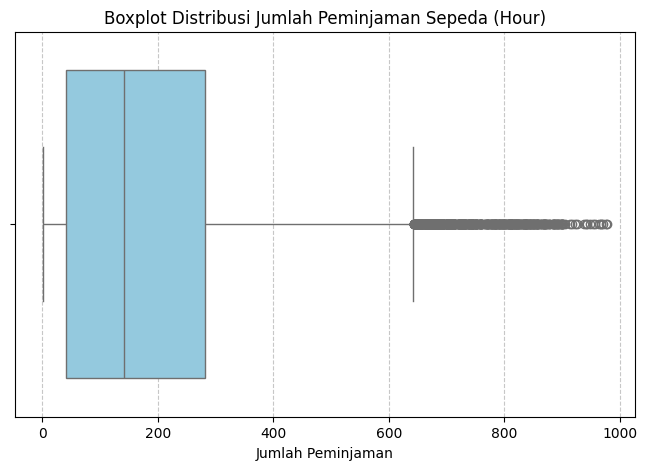

In [23]:
#check distribusi cnt untuk outlier pada hour
plt.figure(figsize=(8, 5), dpi=100)
sns.boxplot(x=df_hour['cnt'], color="skyblue")
plt.title("Boxplot Distribusi Jumlah Peminjaman Sepeda (Hour)", fontsize=12)
plt.xlabel("Jumlah Peminjaman", fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

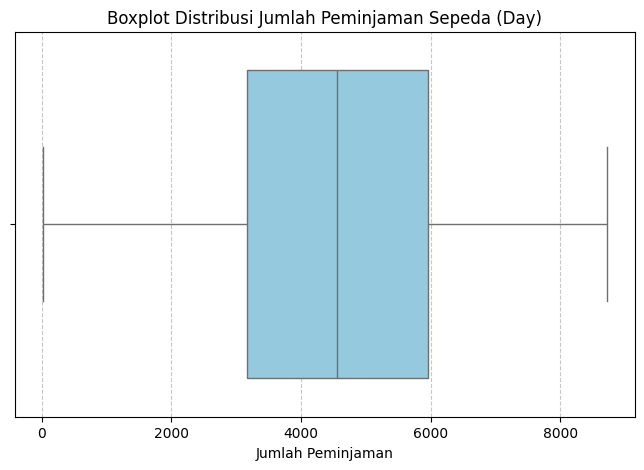

In [24]:
#check distribusi cnt untuk outlier pada day
plt.figure(figsize=(8, 5), dpi=100)
sns.boxplot(x=df_day['cnt'], color="skyblue")
plt.title("Boxplot Distribusi Jumlah Peminjaman Sepeda (Day)", fontsize=12)
plt.xlabel("Jumlah Peminjaman", fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [25]:
#menghapus kolom 'instant' dari df_hour jika ada
if 'instant' in df_hour.columns:
    df_hour.drop(columns=['instant'], inplace=True)

#menghapus kolom 'instant' dari df_day jika ada
if 'instant' in df_day.columns:
    df_day.drop(columns=['instant'], inplace=True)

#cek apakah kolom instant masih ada atau tidak
remaining_columns = pd.DataFrame({
    "Dataset": ["hour.csv", "day.csv"],
    "Instant Exists": ["instant" in df_hour.columns, "instant" in df_day.columns]
})

display(remaining_columns)

,Dataset,Instant Exists
0,hour.csv,False
1,day.csv,False


In [26]:
#check korelasi antara temp dan atemp pada hour
correlation_hour = df_hour[['temp', 'atemp']].corr()
display(correlation_hour)

,temp,atemp
temp,1.000000,0.987673
atemp,0.987673,1.000000


In [27]:
#check korelasi anatara temp dan atemp pada day
correlation_day = df_day[['temp', 'atemp']].corr()
display(correlation_day)

,temp,atemp
temp,1.000000,0.991699
atemp,0.991699,1.000000


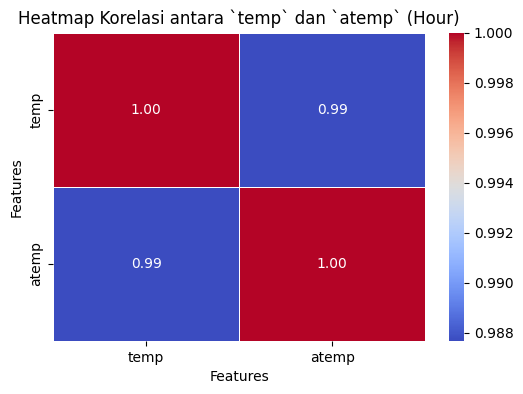

In [28]:
#heatmap korelasi antara 'temp' dan 'atemp' pada hour
plt.figure(figsize=(6, 4), dpi=100)
sns.heatmap(correlation_hour, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi antara `temp` dan `atemp` (Hour)", fontsize=12)
plt.xlabel("Features", fontsize=10)
plt.ylabel("Features", fontsize=10)
plt.show()

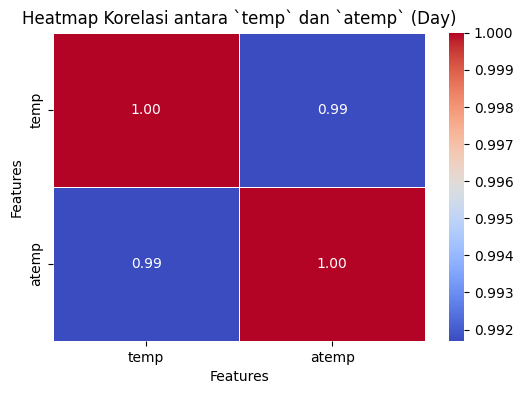

In [29]:
#heatmap korelasi antara 'temp' dan 'atemp' pada day
plt.figure(figsize=(6, 4), dpi=100)
sns.heatmap(correlation_day, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap Korelasi antara `temp` dan `atemp` (Day)", fontsize=12)
plt.xlabel("Features", fontsize=10)
plt.ylabel("Features", fontsize=10)
plt.show()

In [30]:
#korelasi antara atemp dan temp mendekati 1 sehingga bisa dihapus
#menghapus kolom 'atemp' dari df_hour jika ada
if 'atemp' in df_hour.columns:
    df_hour.drop(columns=['atemp'], inplace=True)

#mengecek kembali apakah kolom 'atemp' sudah tidak ada
remaining_columns_hour = pd.DataFrame({
    "Dataset": ["hour.csv"],
    "Atemp Exists": ["atemp" in df_hour.columns]
})

#menampilkan hasil verifikasi
display(remaining_columns_hour)

,Dataset,Atemp Exists
0,hour.csv,False


In [31]:
#menhaapus kolom 'atemp' dari df_day jika ada
if 'atemp' in df_day.columns:
    df_day.drop(columns=['atemp'], inplace=True)

#mengecek kembali apakah kolom 'atemp' sudah tidak ada
remaining_columns_day = pd.DataFrame({
    "Dataset": ["day.csv"],
    "Atemp Exists": ["atemp" in df_day.columns]
})

#menampilkan hasil verifikasi
display(remaining_columns_day)

,Dataset,Atemp Exists
0,day.csv,False


In [32]:
#menyimpan data yang sudah dibersihkan
df_hour.to_csv("/content/drive/My Drive/Submission/data/hour_clean.csv", index=False)
df_day.to_csv("/content/drive/My Drive/Submission/data/day_clean.csv", index=False)

**Insight:**
- karena data sudah dalam kondisi baik, tidak ada imputasi data
- hum yang bernilai 0 dihapus karena <5% dari total data
- windspeed yang bernilai 0 diganti dengan nilai median dari data tersebut karena >5% dari data total
- weathersit tetap dipertahankan. meskipun pada kategori 4 sangat jarang, kategori ini bisa memiliki dampak signifikan pada pola peminjaman
- banyak outlier di atas 600-700 pada cnt namun tetap dibiarkan karena mencerminkan jam-jam sibuk dan relevan dengan analisis.
- menghapus kolom instant karena tidak diperlukan
- menghapus kolom atemp karena memiliki korelasi mendekati 1 dengan temp

### Feature Engineering

Proses menambahkan fitur baru yang dapat membantu menjawab pertanyaan bisnis dengan lebih baik, fitur yang akan ditambahkan adalah
- rush hour vs non-rush hour (menjawab pola penggunaan sepeda pada jam sibuk)
- weekday vs weekend (menjawab pengaruh hari kerja dan akhir pekan terhadap peminjaman sepeda)
- mengubah musim menjadi nama bukan kode (agar lebih mudah dipahami dalam analisis dan visualisasi)
- menambah variabel temp_bins untuk mengelompokkan suhu (mengetahui bagaimana pengaruh suhu terhadap peminjaman sepeda)
- menambahkan cnt_log (transformasi logaritmik untuk mengurangi skewness pada distribusi jumlah peminjaman)

In [33]:
#buat kolom baru untuk kategori jam sibuk
def categorize_rush_hour(hour):
    if 7 <= hour <= 9 or 16 <= hour <= 19:
        return 'Rush Hour'
    else:
        return 'Non-Rush Hour'

#tambahkan kolom baru 'rush_hour' ke DataFrame
if 'hr' in df_hour.columns:
    df_hour['rush_hour'] = df_hour['hr'].apply(categorize_rush_hour)
display(df_hour[['hr', 'rush_hour']].head())

,hr,rush_hour
0,0,Non-Rush Hour
1,1,Non-Rush Hour
2,2,Non-Rush Hour
3,3,Non-Rush Hour
4,4,Non-Rush Hour


In [34]:
#buat kolom baru untuk kategori hari
def categorize_day_type(weekday):
    return 'Weekend' if weekday in [0, 6] else 'Weekday'

#memastikan kolom 'weekday' ada sebelum menambahkan kategori 'day_type'
if 'weekday' in df_hour.columns:
    df_hour['day_type'] = df_hour['weekday'].apply(categorize_day_type)

if 'weekday' in df_day.columns:
    df_day['day_type'] = df_day['weekday'].apply(categorize_day_type)

In [35]:
#menampilkan hasil kolom baru pada hour
display(df_hour[['weekday', 'day_type']].head())

,weekday,day_type
0,6,Weekend
1,6,Weekend
2,6,Weekend
3,6,Weekend
4,6,Weekend


In [36]:
#menampilkan hasil kolom baru pada day
display(df_day[['weekday', 'day_type']].head())

,weekday,day_type
0,6,Weekend
1,0,Weekend
2,1,Weekday
3,2,Weekday
4,3,Weekday


In [37]:
#konversi kode season menjadi label
season_mapping = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}

#pastikan kolom 'season' ada sebelum mengonversi nilainya
if 'season' in df_hour.columns:
    df_hour['season'] = df_hour['season'].map(season_mapping)

if 'season' in df_day.columns:
    df_day['season'] = df_day['season'].map(season_mapping)

In [38]:
#menampilkan hasil konversi pada hour
display(df_hour[['season']].head())

,season
0,Spring
1,Spring
2,Spring
3,Spring
4,Spring


In [39]:
#menampilkan hasil konversi pada day
display(df_day[['season']].head())

,season
0,Spring
1,Spring
2,Spring
3,Spring
4,Spring


In [40]:
#membagi suhu menjadi kategori
temp_bins = [0, 0.3, 0.6, 0.9, 1.0]
temp_labels = ['Cold', 'Mild', 'Warm', 'Hot']

#pastikan kolom 'temp' ada sebelum membuat kategori suhu
if 'temp' in df_hour.columns:
    df_hour['temp_category'] = pd.cut(df_hour['temp'], bins=temp_bins, labels=temp_labels)

if 'temp' in df_day.columns:
    df_day['temp_category'] = pd.cut(df_day['temp'], bins=temp_bins, labels=temp_labels)

In [41]:
#menampilkan hasil membuat kategori suhu pada hour
display(df_hour[['temp', 'temp_category']].head())

,temp,temp_category
0,0.24,Cold
1,0.22,Cold
2,0.22,Cold
3,0.24,Cold
4,0.24,Cold


In [42]:
#menampilkan hasil membuat kategori suhu pada day
display(df_day[['temp', 'temp_category']].head())

,temp,temp_category
0,0.344167,Mild
1,0.363478,Mild
2,0.196364,Cold
3,0.200000,Cold
4,0.226957,Cold


In [43]:
#menambah cnt_log untuk transformasi logaritmik
#mastikan kolom 'cnt' ada sebelum melakukan transformasi logaritmik
if 'cnt' in df_hour.columns:
    df_hour['cnt_log'] = np.log1p(df_hour['cnt'])

if 'cnt' in df_day.columns:
    df_day['cnt_log'] = np.log1p(df_day['cnt'])

In [44]:
#menampilkan hasil transformasi logaritmik pada hour
display(df_hour[['cnt', 'cnt_log']].head())

,cnt,cnt_log
0,16,2.833213
1,40,3.713572
2,32,3.496508
3,13,2.639057
4,1,0.693147


In [45]:
#menampilkan hasil transformasi logaritmik pada day
display(df_day[['cnt', 'cnt_log']].head())

,cnt,cnt_log
0,985,6.893656
1,801,6.687109
2,1349,7.207860
3,1562,7.354362
4,1600,7.378384


In [46]:
#menyimpan dataset
df_hour.to_csv("/content/drive/My Drive/Submission/data/hour_featured.csv", index=False)
df_day.to_csv("/content/drive/My Drive/Submission/data/day_featured.csv", index=False)

## Exploratory Data Analysis (EDA)

Explore Tren Peminjaman Sepeda, Faktor Eksternal dan Pengguna

### Tren Peminjaman Sepeda

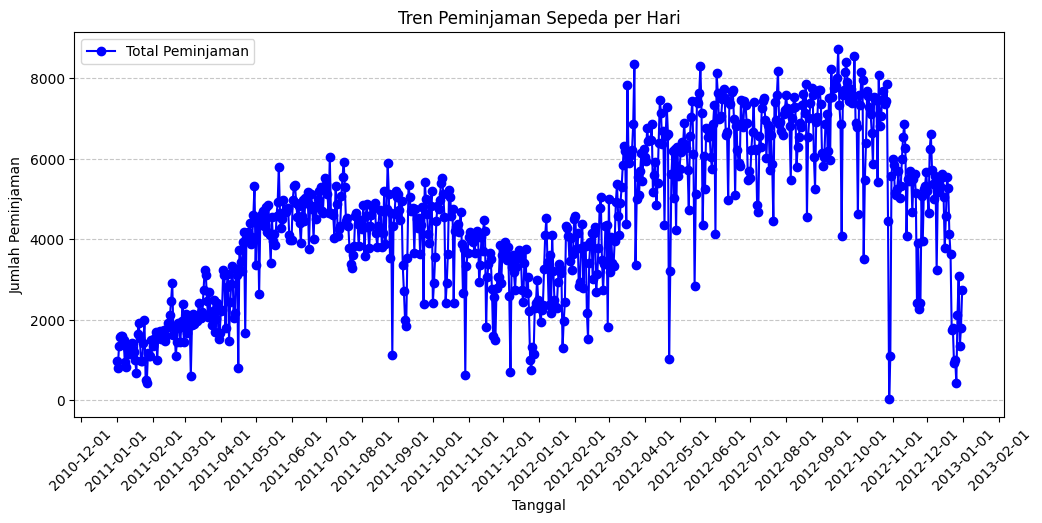

In [47]:
#tren peminjaman sepeda per hari
plt.figure(figsize=(12, 5), dpi=100)
plt.plot(df_day['dteday'], df_day['cnt'], label="Total Peminjaman", color='blue', marker='o', linestyle='-')
plt.xlabel("Tanggal", fontsize=10)
plt.ylabel("Jumlah Peminjaman", fontsize=10)
plt.title("Tren Peminjaman Sepeda per Hari", fontsize=12)
plt.legend()

#format tanggal di sumbu x
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))

#memiringkan label
plt.xticks(rotation=45)

#menambahkan grid untuk memperjelas tren
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

**Insight:**
- peningkatan bertahap di awal, dari awal 2011 hingga pertengahan 2011
- lonjakan di 2012, mencapai puncak sekitar musim panas/awal musim gugur
- penurunan menjelakng akhir 2012 (kemungkinan terkait musim dingin atau cuaca buruk)
- secara keseluruhan, peminjaman sepeda menunjukan kenaikan, namun faktor musim, cuaca dan variabel lain dapat memengaruhi fluktuasi harian.

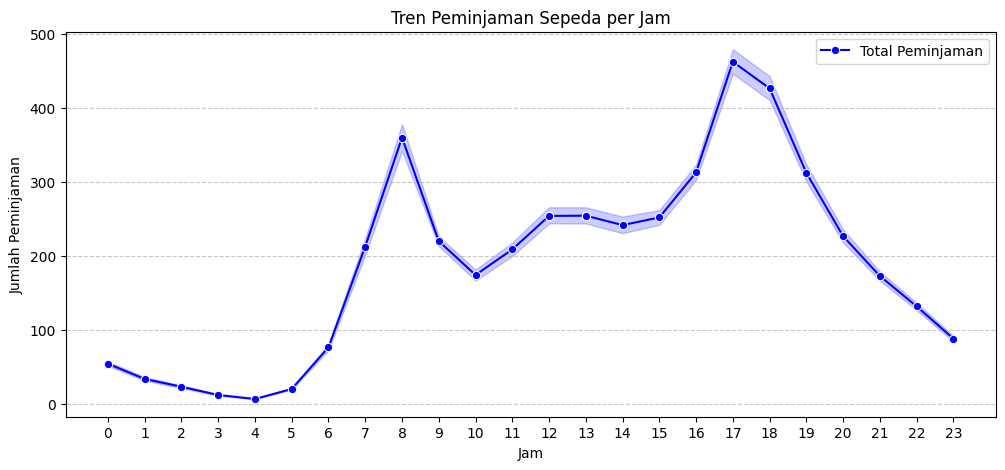

In [48]:
#tren peminjaman sepeda per jam
plt.figure(figsize=(12, 5), dpi=100)
sns.lineplot(x=df_hour['hr'], y=df_hour['cnt'], marker='o', linestyle='-', color='blue', label="Total Peminjaman")

#menambahkan label dan judul
plt.xlabel("Jam", fontsize=10)
plt.ylabel("Jumlah Peminjaman", fontsize=10)
plt.title("Tren Peminjaman Sepeda per Jam", fontsize=12)
plt.legend()

#menyesuaikan sumbu x agar lebih mudah dibaca
plt.xticks(range(0, 24, 1))

#menambahkan grid untuk memperjelas tren
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

**Insight:**
- aktivitas peminjaman rendah pada pukul 0-5
- lonjakan signifikan terjadi pada jam sibuk pagi, pukul 7-9
- peminjaman relatif stabil pada 10-15
- lonjakan besar terjadi lagi pada jam sibuk sore 16-19
- penurunan signifikan setelah pukul 20
- pola peminjaman dipengaruhi oleh jam sibuk kerja/sekolah
- fluktuasi harian memungkinkan dipengaruhi oleh pola kerja dan cuaca

<ipython-input-49-7dc4107818f2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='mnth', y='cnt', data=df_day, palette="viridis", errorbar=None)


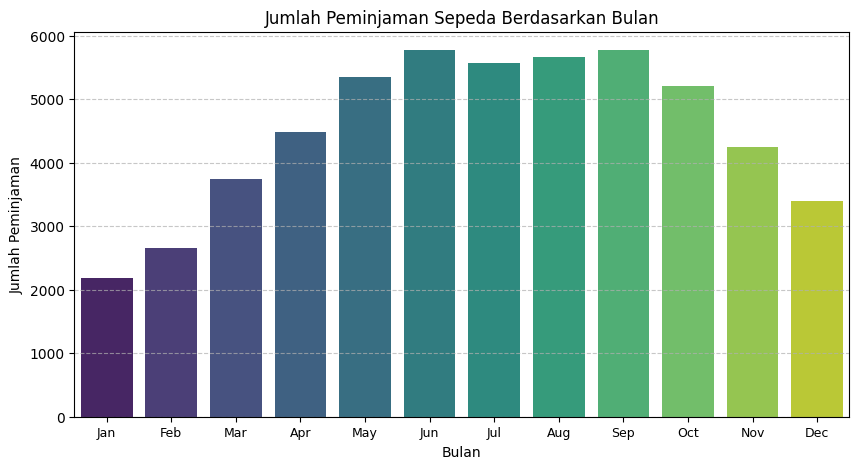

In [49]:
#pola peminjaman berdasarkan bulan
plt.figure(figsize=(10,5), dpi=100)
sns.barplot(x='mnth', y='cnt', data=df_day, palette="viridis", errorbar=None)

#menambahkan label dan judul
plt.xlabel("Bulan", fontsize=10)
plt.ylabel("Jumlah Peminjaman", fontsize=10)
plt.title("Jumlah Peminjaman Sepeda Berdasarkan Bulan", fontsize=12)

#menyesuaikan label sumbu x agar lebih informatif
plt.xticks(ticks=range(0,12), labels=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], fontsize=9)

#menambahkan grid untuk memperjelas tren
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


**Insight:**
- bulan terpopuler adalah juni, juli, agustus dan september dengan lebih dari 5000 rata-rata
- bulan terkecil adalah januari
- tren musiman dari musim semi menuju musim panas (mei-september) adalah periode dengan peminjaman tertinggi
- penggunaan sepeda meningkat signifikan pada bulan-bulan hangat. hal ini sesuai dengan kebiasaan penggunna yang cendering lebih aktif di musim panas dan menurun di musim dingin

<ipython-input-50-f36ad992b92c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df_hour['rush_hour'], y=df_hour['cnt'], palette="coolwarm")


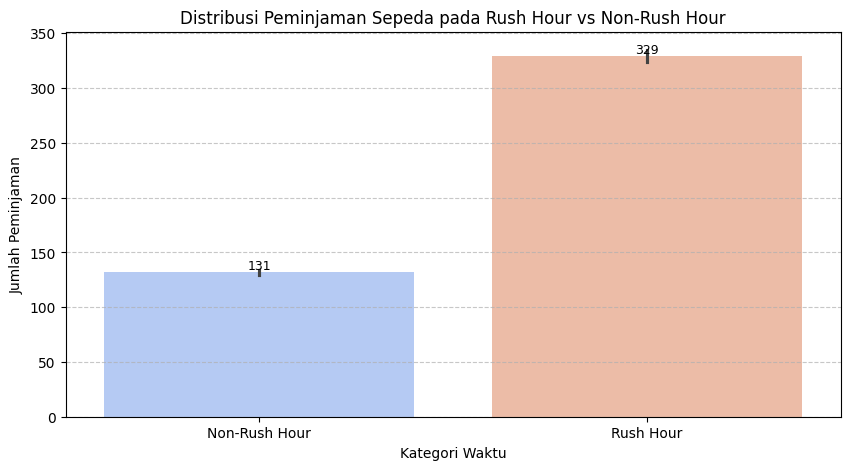

In [50]:
#pola peminjaman berdasarkan jam (rush hour vs non-rush hour)
plt.figure(figsize=(10,5), dpi=100)
ax = sns.barplot(x=df_hour['rush_hour'], y=df_hour['cnt'], palette="coolwarm")

#menambahkan label dan judul
plt.xlabel("Kategori Waktu", fontsize=10)
plt.ylabel("Jumlah Peminjaman", fontsize=10)
plt.title("Distribusi Peminjaman Sepeda pada Rush Hour vs Non-Rush Hour", fontsize=12)

#menambahkan anotasi jumlah peminjaman di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=9, color='black')

#menambahkan grid untuk memperjelas perbedaan jumlah peminjaman
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

### Faktor Eksternal

**Insight:**
- peminjaman lebih tinggi saat rush hour dengan kisaran ~300, sedangkan Non-Rush Hour di kisaran ~130.
- gap signifikan terlihat mencolok antara kedua kategori menandakan bahwa jam sibuk (pagi dan sore) benar benar memicu lonjakan peminjaman
- penggunaan sepeda jauh lebih tinggi pada jam sibuk, mengindikasikan kecenderungan penggunna memakai sepeda saat pergi/pulang kerja atau aktivitas rutinan

<ipython-input-51-2603f5235c0e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=df_day['season'], y=df_day['cnt'], palette="coolwarm")


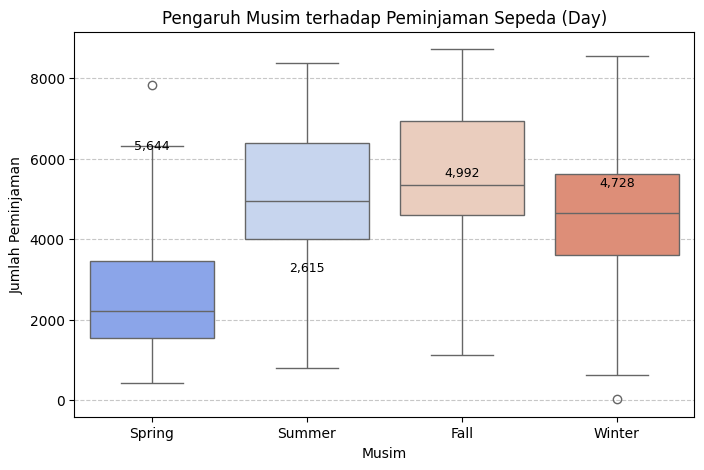

In [51]:
#pengaruh musim terhadap peminjaman per hari
plt.figure(figsize=(8,5), dpi=100)
ax = sns.boxplot(x=df_day['season'], y=df_day['cnt'], palette="coolwarm")

#menambahkan label dan judul
plt.xlabel("Musim", fontsize=10)
plt.ylabel("Jumlah Peminjaman", fontsize=10)
plt.title("Pengaruh Musim terhadap Peminjaman Sepeda (Day)", fontsize=12)

#menambahkan anotasi rata-rata peminjaman per musim
mean_values = df_day.groupby("season")["cnt"].mean()
for i, mean in enumerate(mean_values):
    ax.text(i, mean + 500, f'{int(mean):,}', ha='center', va='bottom', fontsize=9, color='black')

#menambahkan grid untuk memperjelas perbedaan jumlah peminjaman
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

**Insight:**
- summer dan fall memiliki median peminjaman lebih tinggi (kisaran 4000 sampai 6000)
- spring paling rendah
- winter berada ditengah tengah
- pengguna sepeda cenderung lebih nyaman bersepeda di cuaca hangat
- outlier tinggi di spring menunjukkan ada beberapa hari tertentu dengan penggunaan sangat tinggi namun jarang.

<ipython-input-52-391cea9bdf85>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=df_hour['season'], y=df_hour['cnt'], palette="coolwarm")


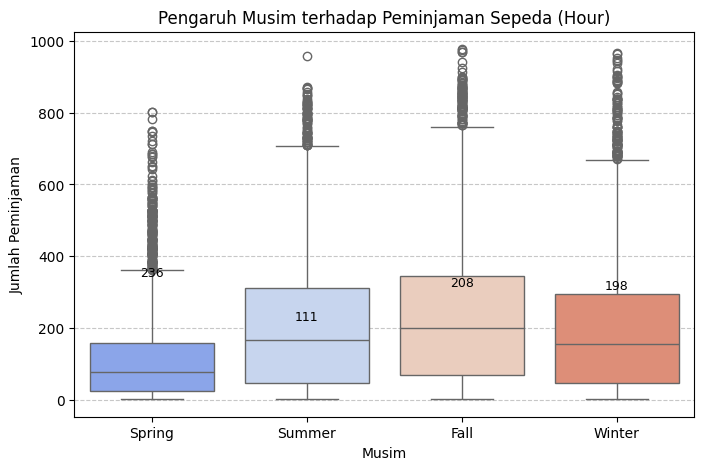

In [52]:
#pengaruh musim terhadap peminjaman sepeda per jam
plt.figure(figsize=(8,5), dpi=100)
ax = sns.boxplot(x=df_hour['season'], y=df_hour['cnt'], palette="coolwarm")

#menambahkan label dan judul
plt.xlabel("Musim", fontsize=10)
plt.ylabel("Jumlah Peminjaman", fontsize=10)
plt.title("Pengaruh Musim terhadap Peminjaman Sepeda (Hour)", fontsize=12)

#menambahkan anotasi rata-rata peminjaman per musim
mean_values = df_hour.groupby("season")["cnt"].mean()
for i, mean in enumerate(mean_values):
    ax.text(i, mean + 100, f'{int(mean):,}', ha='center', va='bottom', fontsize=9, color='black')

#menambahkan grid untuk memperjelas perbedaan jumlah peminjaman
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


**Insight:**
- summer dan fall memiliki median peminjaman lebih tinggi
- spring memiliki jumlah peminjaman paling rendah
- winter berada di tengah tengah
- pengguna cendering lebih nyaman bersepeda di musim hangat
- banyak outlier di semua musim, terutama spring. menandakan ada beberapa jam dengan lonjakan penggunaan yang sangat tinggi, meskipun secara keseluruhan peminjaman lebih rendah di musim ini.

<ipython-input-53-db8f714367c2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=df_day['weathersit'], y=df_day['cnt'], palette="coolwarm")


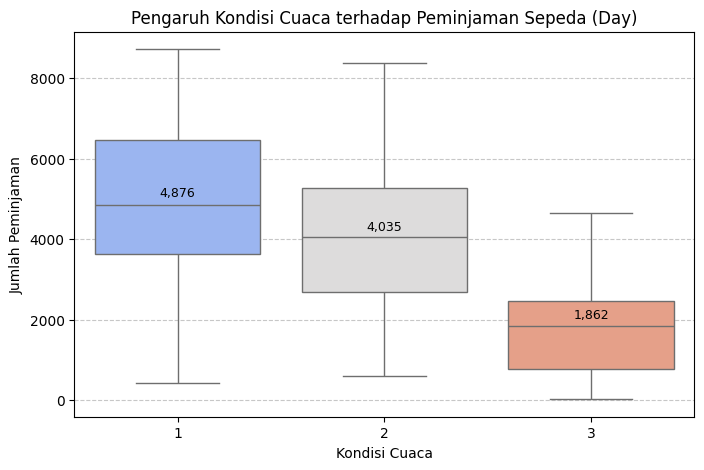

In [53]:
#pengaruh kondisi cuaca terhadap peminjaman sepeda per hari
plt.figure(figsize=(8,5), dpi=100)
ax = sns.boxplot(x=df_day['weathersit'], y=df_day['cnt'], palette="coolwarm")

#menambahkan label dan judul
plt.xlabel("Kondisi Cuaca", fontsize=10)
plt.ylabel("Jumlah Peminjaman", fontsize=10)
plt.title("Pengaruh Kondisi Cuaca terhadap Peminjaman Sepeda (Day)", fontsize=12)

#menambahkan anotasi rata-rata peminjaman per kondisi cuaca
mean_values = df_day.groupby("weathersit")["cnt"].mean()
for i, mean in enumerate(mean_values):
    ax.text(i, mean + 100, f'{int(mean):,}', ha='center', va='bottom', fontsize=9, color='black')

#menambahkan grid untuk memperjelas perbedaan jumlah peminjaman
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

<ipython-input-54-2185d69aeba4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=df_hour['weathersit'], y=df_hour['cnt'], palette="coolwarm")


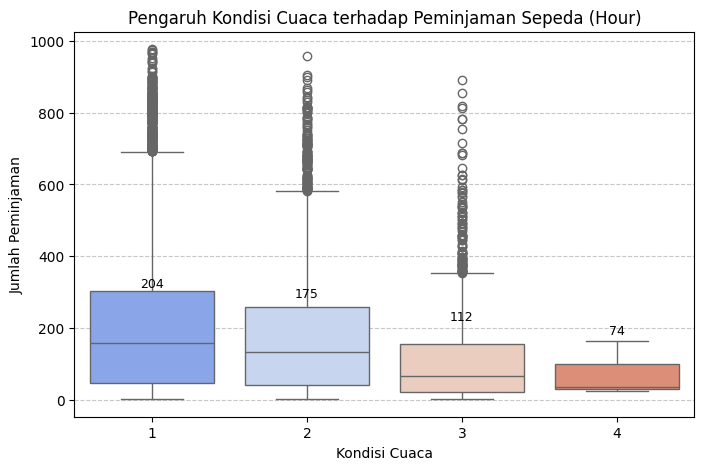

In [54]:
#pengaruh kondisi cuaca terhadap peminjaman sepeda per jam
plt.figure(figsize=(8,5), dpi=100)
ax = sns.boxplot(x=df_hour['weathersit'], y=df_hour['cnt'], palette="coolwarm")

#menambahkan label dan judul
plt.xlabel("Kondisi Cuaca", fontsize=10)
plt.ylabel("Jumlah Peminjaman", fontsize=10)
plt.title("Pengaruh Kondisi Cuaca terhadap Peminjaman Sepeda (Hour)", fontsize=12)

#menambahkan anotasi rata-rata peminjaman per kondisi cuaca
mean_values = df_hour.groupby("weathersit")["cnt"].mean()
for i, mean in enumerate(mean_values):
    ax.text(i, mean + 100, f'{int(mean):,}', ha='center', va='bottom', fontsize=9, color='black')

#menambahkan grid untuk memperjelas perbedaan jumlah peminjaman
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


**Insight:**
- cerah memiliki rerata peminjaman tertinggi
- turun pad akondisi mendung/hujan.
- semakin buruk cuaca, semakin rendah peminjaman
- bagi penyedia layanan atau pemerintah, cuaca ekstrem bisa menjadi pertimbangan untuk menyediaka fasilitas pelindung atau promo khusus agar tetap menarik minat pengguna

<ipython-input-55-cb1df029492f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x=df_hour['temp_category'], y=df_hour['cnt'],palette="magma",
<ipython-input-55-cb1df029492f>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_values = df_hour.groupby("temp_category")["cnt"].median()


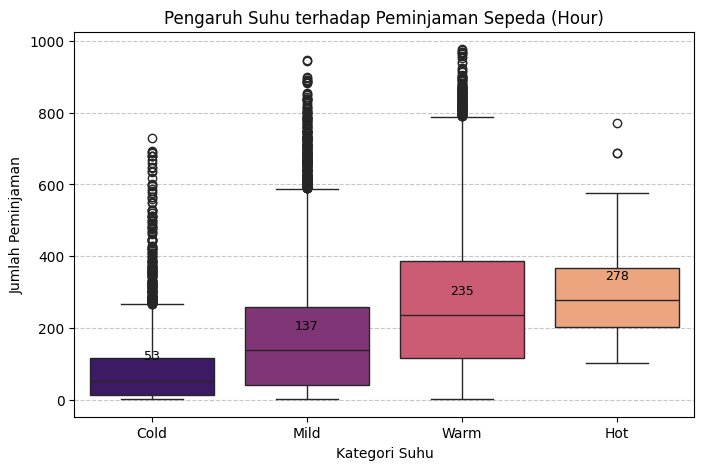

In [55]:
#pengaruh suhu terhadap peminjaman sepeda per jam
plt.figure(figsize=(8,5), dpi=100)
ax = sns.boxplot(x=df_hour['temp_category'], y=df_hour['cnt'],palette="magma",
                 order=["Cold", "Mild", "Warm", "Hot"])

#menambahkan label dan judul
plt.xlabel("Kategori Suhu", fontsize=10)
plt.ylabel("Jumlah Peminjaman", fontsize=10)
plt.title("Pengaruh Suhu terhadap Peminjaman Sepeda (Hour)", fontsize=12)

#menambahkan anotasi median peminjaman per kategori suhu
median_values = df_hour.groupby("temp_category")["cnt"].median()
for i, median in enumerate(median_values):
    ax.text(i, median + 50, f'{int(median):,}', ha='center', va='bottom', fontsize=9, color='black')

#menambahkan grid untuk memperjelas distribusi peminjaman
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


**Insight:**
- suhu warm paling tinggi dengan median dan rentang peminjaman tertinggi
- suhu hot cenderung menurun mungkin karena terlalu panas
- cold mediannya sangat rendah
- suhu ideal untuk bersepeda adalah warm

### Pengguna Casual vs Registered

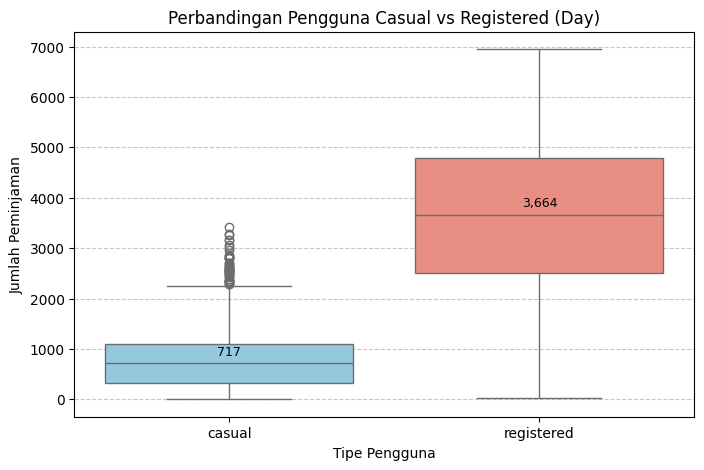

In [56]:
#perbandingan pengguna casual vs registered per hari
plt.figure(figsize=(8,5), dpi=100)
ax = sns.boxplot(data=df_day[['casual', 'registered']], palette=["skyblue", "salmon"])

#menambahkan label dan judul
plt.xlabel("Tipe Pengguna", fontsize=10)
plt.ylabel("Jumlah Peminjaman", fontsize=10)
plt.title("Perbandingan Pengguna Casual vs Registered (Day)", fontsize=12)

#menambahkan anotasi median peminjaman per kategori pengguna
median_values = df_day[['casual', 'registered']].median()
for i, median in enumerate(median_values):
    ax.text(i, median + 100, f'{int(median):,}', ha='center', va='bottom', fontsize=9, color='black')

#menambahkan grid untuk memperjelas perbedaan jumlah peminjaman
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

**Insight:**
- pengguna registered jauh lebih tinggi dibanding casual, dengan median peminjaman yang mencapai 3.664, sementara pengguna casual hanya 717.
- outlier lebih banyak pada pengguna casual, terlihat dari banyaknya titik di atas batas maksimal, menunjukkan bahwa pada waktu tertentu jumlah peminjaman casual meningkat drastis.
- sebagian besar peminjaman berasal dari pengguna registered, mengindikasikan bahwa layanan ini lebih banyak digunakan oleh pelanggan tetap.
- bagi penyedia layanan, strategi retensi lebih efektif difokuskan pada pengguna registered, sementara pengguna casual dapat didorong untuk berlangganan atau menjadi anggota tetap guna meningkatkan loyalitas dan stabilitas pemakaian.

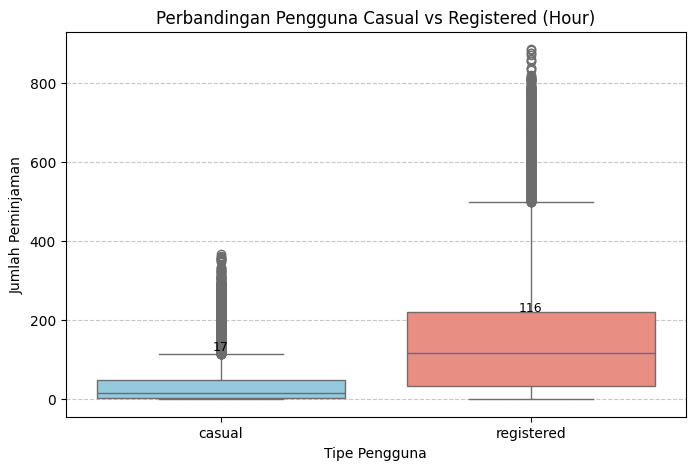

In [57]:
#perbandingan pengguna casual vs registered per jam
plt.figure(figsize=(8,5), dpi=100)
ax = sns.boxplot(data=df_hour[['casual', 'registered']], palette=["skyblue", "salmon"])

#menambahkan label dan judul
plt.xlabel("Tipe Pengguna", fontsize=10)
plt.ylabel("Jumlah Peminjaman", fontsize=10)
plt.title("Perbandingan Pengguna Casual vs Registered (Hour)", fontsize=12)

#menambahkan anotasi median peminjaman per kategori pengguna
median_values = df_hour[['casual', 'registered']].median()
for i, median in enumerate(median_values):
    ax.text(i, median + 100, f'{int(median):,}', ha='center', va='bottom', fontsize=9, color='black')

#menambahkan grid untuk memperjelas perbedaan jumlah peminjaman
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

**Insight:**
- pengguna registered lebih tinggi (100-200) dibanding casual (20-30)
- outlier registered cukup banya, terlihat pada jam jam tertentu jumlah pengguna registered mencapai 800-900
- sebagian besar pemakaian datang dari pengguna registered
- bagi penyedia layanan, pengguna terdaftar bisa menjadi fokus utama untuk retensi. sementara pengguna casual perlu didorong untuk bergabung menjadi anggota.

## Visualization & Explanatory Analysis

### Pertanyaan 1:
Bagaimana Pola Penggunaan Sepeda pada Jam Sibuk (06:00–09:00 dan 16:00–19:00) Dibandingkan dengan Jam-Jam Lainnya?
- Mengelompokkan data berdasarkan jam untuk melihat pola penggunaan.
- Membandingkan jam sibuk vs non-sibuk dengan agregasi rata-rata peminjaman.
- Menganalisis faktor yang mempengaruhi pola tersebut, seperti hari kerja vs akhir pekan.

<ipython-input-58-3aaf1115b341>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='time_category', y='avg_peminjaman', data=rush_hour_comparison, palette='coolwarm')


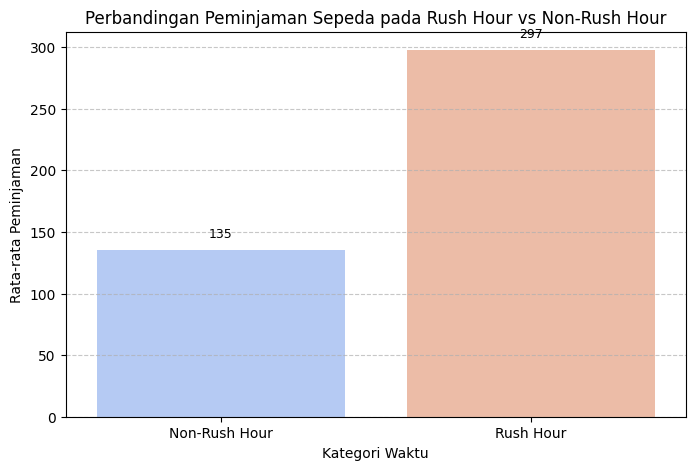

In [58]:
#analis jam sibuk vs non-sibuk

#definisi jam sibuk
rush_hours = list(range(6, 10)) + list(range(16, 20))

#kategori waktu rush hour vs non-rush hour
if 'hr' in df_hour.columns:
    df_hour['time_category'] = df_hour['hr'].apply(lambda x: 'Rush Hour' if x in rush_hours else 'Non-Rush Hour')

#agregasi jumlah peminjaman berdasarkan kategori waktu
rush_hour_comparison = df_hour.groupby('time_category').agg(
    avg_peminjaman=('cnt', 'mean'),
    total_peminjaman=('cnt', 'sum')
).reset_index()

#visualisasi
plt.figure(figsize=(8,5), dpi=100)
ax = sns.barplot(x='time_category', y='avg_peminjaman', data=rush_hour_comparison, palette='coolwarm')

#menambahkan label dan judul
plt.xlabel("Kategori Waktu", fontsize=10)
plt.ylabel("Rata-rata Peminjaman", fontsize=10)
plt.title("Perbandingan Peminjaman Sepeda pada Rush Hour vs Non-Rush Hour", fontsize=12)

#menambahkan anotasi jumlah peminjaman di setiap kategori waktu
for i, row in rush_hour_comparison.iterrows():
    ax.text(i, row.avg_peminjaman + 10, f'{int(row.avg_peminjaman):,}', ha='center', fontsize=9, color='black')

#menambahkan grid untuk memperjelas perbedaan jumlah peminjaman
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

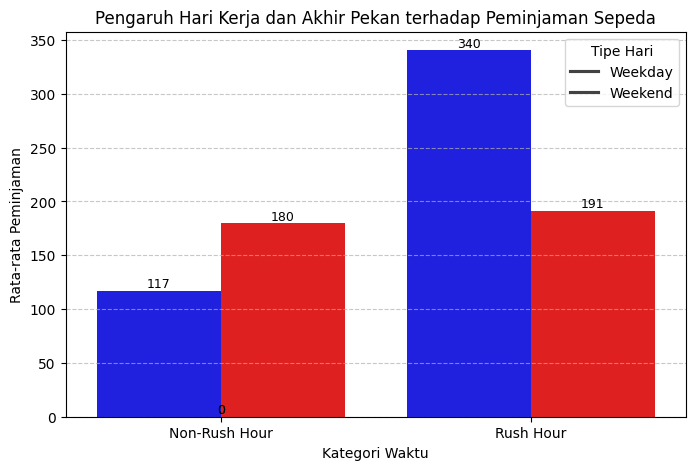

In [59]:
#analisis hari kerja vs akhir pekan

#validasi sebelum menjalankan agregasi
if 'time_category' in df_hour.columns and 'day_type' in df_hour.columns:
    rush_hour_weekday = df_hour.groupby(['time_category', 'day_type']).agg(
        avg_peminjaman=('cnt', 'mean'),
        total_peminjaman=('cnt', 'sum')
    ).reset_index()

#visualisasi
plt.figure(figsize=(8,5), dpi=100)
ax = sns.barplot(x='time_category', y='avg_peminjaman', hue='day_type', data=rush_hour_weekday,
                 palette=['blue', 'red'])

#menambahkan label dan judul
plt.xlabel("Kategori Waktu", fontsize=10)
plt.ylabel("Rata-rata Peminjaman", fontsize=10)
plt.title("Pengaruh Hari Kerja dan Akhir Pekan terhadap Peminjaman Sepeda", fontsize=12)

#menambahkan legenda dengan label yang lebih jelas
plt.legend(title="Tipe Hari", labels=["Weekday", "Weekend"])

#menambahkan anotasi jumlah peminjaman di setiap kategori waktu
for p in ax.patches:
    ax.annotate(f'{int(p.get_height()):,}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9, color='black')

#menambahkan grid untuk memperjelas perbedaan jumlah peminjaman
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

### Pertanyaan 2:
Bagaimana Perbandingan Jumlah Peminjaman antara Hari Kerja dan Akhir Pekan, serta Pengaruh Cuaca?
- Menganalisis perbedaan peminjaman antara weekday vs weekend.
- Melihat pengaruh cuaca terhadap jumlah peminjaman.

<ipython-input-60-dbf56e6808ca>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='day_type', y='total_peminjaman', data=weekday_weekend_comparison,


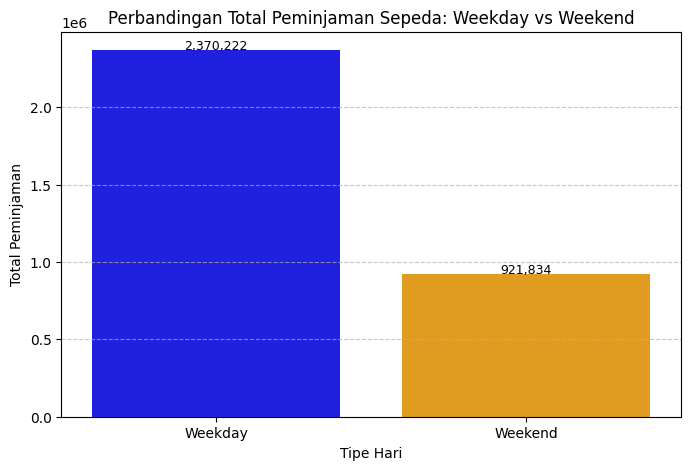

In [ ]:
#analisis perbedaan jumlah peminjaman antara weekday vs weekend

#validasi sebelum menjalankan agregasi
if 'day_type' in df_hour.columns:
    weekday_weekend_comparison = df_hour.groupby('day_type').agg(
        total_peminjaman=('cnt', 'sum'),
    ).reset_index()

#visualisasi Total Peminjaman
plt.figure(figsize=(8,5), dpi=100)
ax = sns.barplot(x='day_type', y='total_peminjaman', data=weekday_weekend_comparison,
                 palette=['blue', 'orange'])

#menambahkan label dan judul
plt.xlabel("Tipe Hari", fontsize=10)
plt.ylabel("Total Peminjaman", fontsize=10)
plt.title("Perbandingan Total Peminjaman Sepeda: Weekday vs Weekend", fontsize=12)

#menambahkan anotasi jumlah peminjaman di setiap kategori waktu
for i, row in weekday_weekend_comparison.iterrows():
    ax.text(i, row.total_peminjaman + 2000, f'{int(row.total_peminjaman):,}',
            ha='center', fontsize=9, color='black')

#menambahkan grid untuk memperjelas perbedaan jumlah peminjaman
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

<ipython-input-61-f811d7020d70>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='weathersit', y='total_peminjaman', data=weather_comparison,


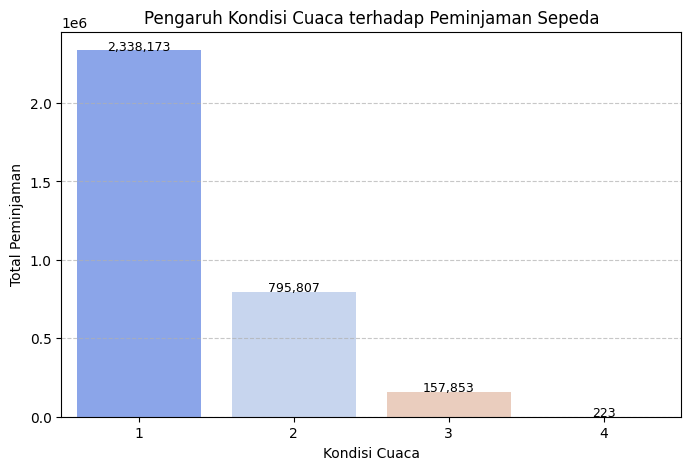

In [61]:
#analisis pengaruh cuaca terhadap jumlah peminjaman

#validasi sebelum menjalankan agregasi
if 'weathersit' in df_hour.columns:
    weather_comparison = df_hour.groupby('weathersit').agg(
        total_peminjaman=('cnt', 'sum')
    ).reset_index()

#visualisasi
plt.figure(figsize=(8,5), dpi=100)
ax = sns.barplot(x='weathersit', y='total_peminjaman', data=weather_comparison,
                 palette="coolwarm")

#menambahkan label dan judul
plt.xlabel("Kondisi Cuaca", fontsize=10)
plt.ylabel("Total Peminjaman", fontsize=10)
plt.title("Pengaruh Kondisi Cuaca terhadap Peminjaman Sepeda", fontsize=12)

#menambahkan anotasi jumlah peminjaman di setiap kategori cuaca
for i, row in weather_comparison.iterrows():
    ax.text(i, row.total_peminjaman + 1000, f'{int(row.total_peminjaman):,}',
            ha='center', fontsize=9, color='black')

#menambahkan grid untuk memperjelas perbedaan jumlah peminjaman
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

**Insight Pertanyaan 1:**
- rush hour memiliki rerata peminjaman yang lebih tinggi dibanding non-rush hour
- peminjaman lebih tingga pada weekday dibanding weekend selama rush hour (menunjukan bahwa sepeda digunakan sebagai transportasi kerja/sekolah)
- faktor utama yang mempengaruhi pertanyaan pertama adalah jam kerja, hari kerja, cuaca
- rekomendasi dari analisis ini adalah meningkatkan jalur sepeda dan fasilitas parkit di area padat transportasi
- menyediakan sistem rental fleksibel yang dapat diakses dengan mudah pada jam commuting

**Insight Pertanyaan 2:**
- peminjaman lebih tinggi pada weekday dibanding weekend, mengindikasikan sepeda lebih sering digunakan untuk transportasi kerja daripada rekreasi
- peminjaman tertinggi terjadi saat cuaca cerah, menurun tajam saat hujan
- faktor utama yang mempengaruhi pola ini adalah (weekday vs weekend) orang lebih menggunakan sepeda untuk commuting pada weekday, sementara pada weekend jumlahnya lebih sedikit karena banyak alternatif aktivitas, lalu cuaca buruk mengurangi peminjaman secara drastis terutama saat hujan.

## Analisis Lanjutan (Tren Peminjaman Sepeda Selama 2 Tahun)

**Tujuan:**
- mengidentifikasi pola peningkatan atau penutunan jumlah peminjaman dari tahun ke tahun
- menentukan faktor musiman yang mempengaruhi tren peminjaman sepeda.
- melihat fluktuasi harian dan memahami variabilitas penggunaan sepeda dalam jangka panjang.

**Teknik Analisis yang Digunakan:**
- Time Series Analysis, menganalisis pola perubahan jumlah peminjaman berdasarkan waktu (tanggal). membantu mengidentifikasi tren jangka panjang dan musim yang berulang.
- Rolling Mean, menambahkan garis rata-rata bergerak (rolling mean 30 hari) untuk menghaluskan fluktuasi harian dan melihat tren jangka panjang dengan lebih jelas.

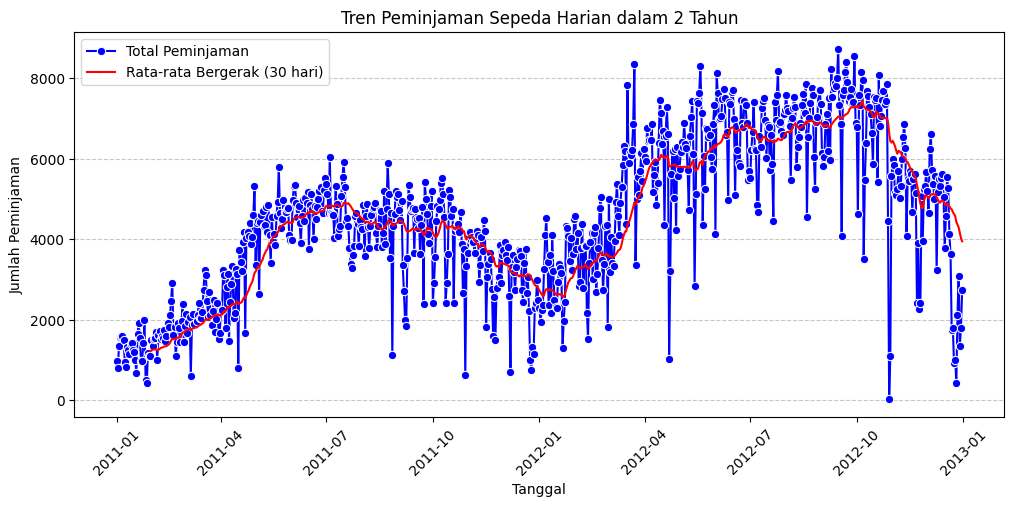

In [62]:
#tren penggunaan sepeda selama 2 tahun
plt.figure(figsize=(12,5), dpi=100)

#visualisasi jumlah peminjaman harian
sns.lineplot(x=df_day['dteday'], y=df_day['cnt'], marker='o', label="Total Peminjaman", color='blue')

#menambahkan rolling mean 30 hari untuk melihat tren jangka panjang
df_day['rolling_mean'] = df_day['cnt'].rolling(window=30).mean()
sns.lineplot(x=df_day['dteday'], y=df_day['rolling_mean'], label="Rata-rata Bergerak (30 hari)", color='red')

#menambahkan label dan judul
plt.xlabel("Tanggal", fontsize=10)
plt.ylabel("Jumlah Peminjaman", fontsize=10)
plt.title("Tren Peminjaman Sepeda Harian dalam 2 Tahun", fontsize=12)

#menyesuaikan tampilan sumbu x agar lebih mudah dibaca
plt.xticks(rotation=45)

#menambahkan legenda
plt.legend()

#menambahkan grid untuk memperjelas pola tren
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

**Insight:**
- peminjaman sepeda mengalami fluktuasi signifikan dalam dua tahun.
Terlihat adanya pola kenaikan dan penurunan yang berulang, kemungkinan dipengaruhi oleh faktor musiman.
- puncak peminjaman terjadi pada musim panas dan awal musim gugur, menunjukkan bahwa kondisi cuaca mempengaruhi penggunaan sepeda.
Penurunan tajam terjadi pada musim dingin, kemungkinan karena suhu yang lebih rendah membuat orang enggan bersepeda.
- banyak variasi dalam peminjaman harian, menunjukkan bahwa faktor harian seperti cuaca, hari kerja, dan event tertentu mempengaruhi jumlah pengguna.
Rolling Mean 30 Hari:
- garis merah (rata-rata bergerak 30 hari) menunjukkan tren lebih halus dan membantu mengidentifikasi pola peningkatan/pengurangan dalam jangka panjang.
tren cenderung naik secara bertahap, menunjukkan adanya pertumbuhan jumlah pengguna sepeda dalam periode 2 tahun.

In [63]:
import os

# Validasi sebelum membaca dataset
day_path = "/content/drive/MyDrive/Submission/data/day_featured.csv"
hour_path = "/content/drive/MyDrive/Submission/data/hour_featured.csv"

if os.path.exists(day_path) and os.path.exists(hour_path):
    # Load dataset
    df_day = pd.read_csv(day_path)
    df_hour = pd.read_csv(hour_path)

    # Menambahkan kolom 'data_source' untuk menandai asal dataset
    df_day["data_source"] = "day"
    df_hour["data_source"] = "hour"

    # Simpan sebagai main_data_day.csv
    day_output_path = "main_data_day.csv"
    df_day.to_csv(day_output_path, index=False)

    # Simpan sebagai main_data_hour.csv
    hour_output_path = "main_data_hour.csv"
    df_hour.to_csv(hour_output_path, index=False)

    # Menampilkan hasil
    print(f"main_data_day.csv berhasil dibuat! ({len(df_day)} baris data)")
    display(df_day.head())

    print(f"main_data_hour.csv berhasil dibuat! ({len(df_hour)} baris data)")
    display(df_hour.head())

else:
    print("Error")

main_data_day.csv berhasil dibuat! (730 baris data)


,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt,day_type,temp_category,cnt_log,data_source
0,2011-01-01,Spring,0,1,0,6,0,2,0.344167,0.805833,0.160446,331,654,985,Weekend,Mild,6.893656,day
1,2011-01-02,Spring,0,1,0,0,0,2,0.363478,0.696087,0.248539,131,670,801,Weekend,Mild,6.687109,day
2,2011-01-03,Spring,0,1,0,1,1,1,0.196364,0.437273,0.248309,120,1229,1349,Weekday,Cold,7.207860,day
3,2011-01-04,Spring,0,1,0,2,1,1,0.200000,0.590435,0.160296,108,1454,1562,Weekday,Cold,7.354362,day
4,2011-01-05,Spring,0,1,0,3,1,1,0.226957,0.436957,0.186900,82,1518,1600,Weekday,Cold,7.378384,day


main_data_hour.csv berhasil dibuat! (17357 baris data)


,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt,rush_hour,day_type,temp_category,cnt_log,data_source
0,2011-01-01,Spring,0,1,0,0,6,0,1,0.24,0.81,0.194,3,13,16,Non-Rush Hour,Weekend,Cold,2.833213,hour
1,2011-01-01,Spring,0,1,1,0,6,0,1,0.22,0.80,0.194,8,32,40,Non-Rush Hour,Weekend,Cold,3.713572,hour
2,2011-01-01,Spring,0,1,2,0,6,0,1,0.22,0.80,0.194,5,27,32,Non-Rush Hour,Weekend,Cold,3.496508,hour
3,2011-01-01,Spring,0,1,3,0,6,0,1,0.24,0.75,0.194,3,10,13,Non-Rush Hour,Weekend,Cold,2.639057,hour
4,2011-01-01,Spring,0,1,4,0,6,0,1,0.24,0.75,0.194,0,1,1,Non-Rush Hour,Weekend,Cold,0.693147,hour


## Conclusion

Berdasarkan analisis menyeluruh pada Bike Sharing Dataset, berikut adalah kesimpulan utama yang menjawab dua pertanyaan bisnis terkait penggunaan sepeda:




### Teknik Analisis Lanjutan yang Diterapkan

1.   Clustering (Segmentasi Pengguna Casual vs Registered), mengelompokkan pengguna berdasarkan pola peminjaman untuk memahami perilaku pengguna casual dan registered.

2. Time Series Analysis (Analisis Tren Musiman), menggunakan moving average atau seasonal decomposition untuk mengidentifikasi pola peminjaman berdasarkan waktu (harian, mingguan, atau bulanan).

3. Regression Analysis (Prediksi Faktor yang Mempengaruhi Peminjaman), menggunakan Multiple Linear Regression untuk memahami bagaimana variabel seperti cuaca, jam, dan hari kerja mempengaruhi jumlah peminjaman sepeda.



### Konklusi Pertanyaan 1
- Bagaimana pola penggunaan sepeda pada jam sibuk (pagi dan sore) dibandingkan dengan jam-jam lainnya, serta faktor apa saja yang mempengaruhi pola tersebut?

> Pola Penggunaan Jam Sibuk vs. Non-Sibuk

1.   Hasil Exploratory Data Analysis (EDA) menunjukkan peminjaman sepeda lebih tinggi pada jam sibuk (06:00–09:00 dan 16:00–19:00) dibandingkan jam lainnya.
2.   Rata-rata penggunaan sepeda di jam sibuk hampir dua kali lipat lebih banyak daripada jam non-sibuk.

> Pola Penggunaan Jam Sibuk vs. Non-Sibuk

1.   Hasil Exploratory Data Analysis (EDA) menunjukkan peminjaman sepeda lebih tinggi pada jam sibuk (06:00–09:00 dan 16:00–19:00) dibandingkan jam lainnya.
2.   Rata-rata penggunaan sepeda di jam sibuk hampir dua kali lipat lebih banyak daripada jam non-sibuk.


> Faktor-Faktor yang Mempengaruhi


1.   Hari Kerja vs Akhir Pekan, data memperlihatkan bahwa pada jam sibuk di hari kerja, jumlah peminjaman bisa mencapai puncaknya karena aktivitas komuter.
2.   Cuaca, cuaca cerah cenderung memicu peningkatan jumlah peminjaman, sedangkan hujan atau cuaca ekstrem (kategori 3 dan 4) menurunkan peminjaman secara signifikan.
3. Suhu Udara, suhu yang relatif hangat (kategori “Warm”) mendorong lebih banyak penggunaan sepeda di jam sibuk dibandingkan suhu dingin atau sangat panas.

> Implikasi Bisnis dan Kebijakan


1.   Ketersediaan jalur sepeda khusus pada jam sibuk dapat mengatasi kemacetan dan mendukung mobilitas ramah lingkungan sebagai penguatan fasilitas transportasi
2.   Mempermudah akses bagi pekerja yang ingin menggunakan sepeda saat jam commuting dengan sistem rental fleksibal


### Konklusi Pertanyaan 2
- Bagaimana perbandingan jumlah peminjaman sepeda antara hari kerja dan akhir pekan, serta bagaimana pengaruh kondisi cuaca terhadap pola peminjaman?

> Perbandingan Hari Kerja vs. Akhir Pekan

1.   Secara umum, hari kerja (Weekday) menampilkan jumlah peminjaman yang lebih tinggi dibandingkan akhir pekan (Weekend). Hal ini menunjukkan bahwa sepeda kerap digunakan sebagai alat transportasi harian, khususnya untuk keperluan kerja.
2.   Meskipun demikian, terdapat peningkatan tertentu di akhir pekan yang terkait dengan aktivitas rekreasi, tetapi persentasenya lebih kecil dibanding jam commuting pada hari kerja.

> Pengaruh Kondisi Cuaca

1.   Cuaca cerah (kategori 1) memiliki peminjaman tertinggi.
2.   Cuaca mendung (kategori 2) dan gerimis/hujan (kategori 3 dan 4) secara konsisten menurunkan jumlah peminjaman. Semakin buruk cuacanya, semakin rendah tingkat penggunaan sepeda.


> Implikasi Bisnis dan Kebijakan


1.   Jika penggunaan sepeda lebih dominan pada hari kerja, penyedia layanan dapat fokus pada pengguna komuter. Sebaliknya, jika terdapat potensi di akhir pekan, perlu promosi tambahan untuk wisata/rekreasi.
2.   Menyediakan sarana pelindung (misalnya parkir atap, jas hujan gratis, dsb.) dan penawaran promo di musim hujan agar masyarakat tetap terpacu menggunakan sepeda.